In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Linear Regression with Python

Link to Kaggle Dataset: https://www.kaggle.com/datasets/kolawale/focusing-on-mobile-app-or-website

## Understand the Dataset
- Email
- Address
- Avatar: the image they used in the platform to represent themselves
- Avg. Session length:
- Time on App: how many minutes they spent on the application before they order.
- Time on Website
- Length of Membership: measured in months
- Yearly Amount Spent: measured in dollars.

**Problem Statement** Could we predict the Yearly Amount Spent by user in the platform using the metrics we have collected? Which metrics are the most important?

In [3]:
df = pd.read_csv("Ecommerce.csv")
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
# To understand how the dataset is structured
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


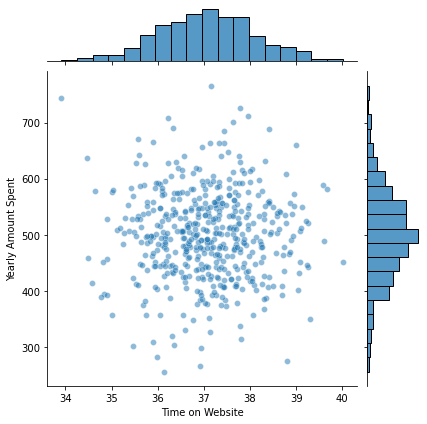

In [6]:
# EDA
# alpha = 0.5 allows each plot has a level of opacity
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=df,alpha=0.5)

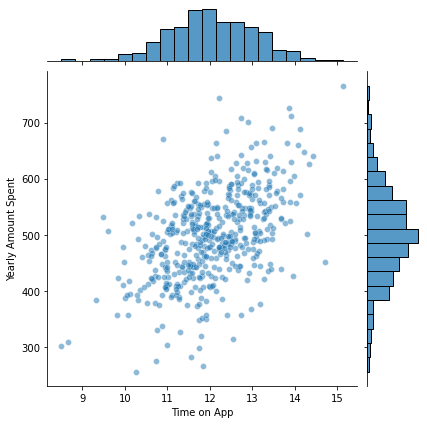

In [7]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=df,alpha=0.5)

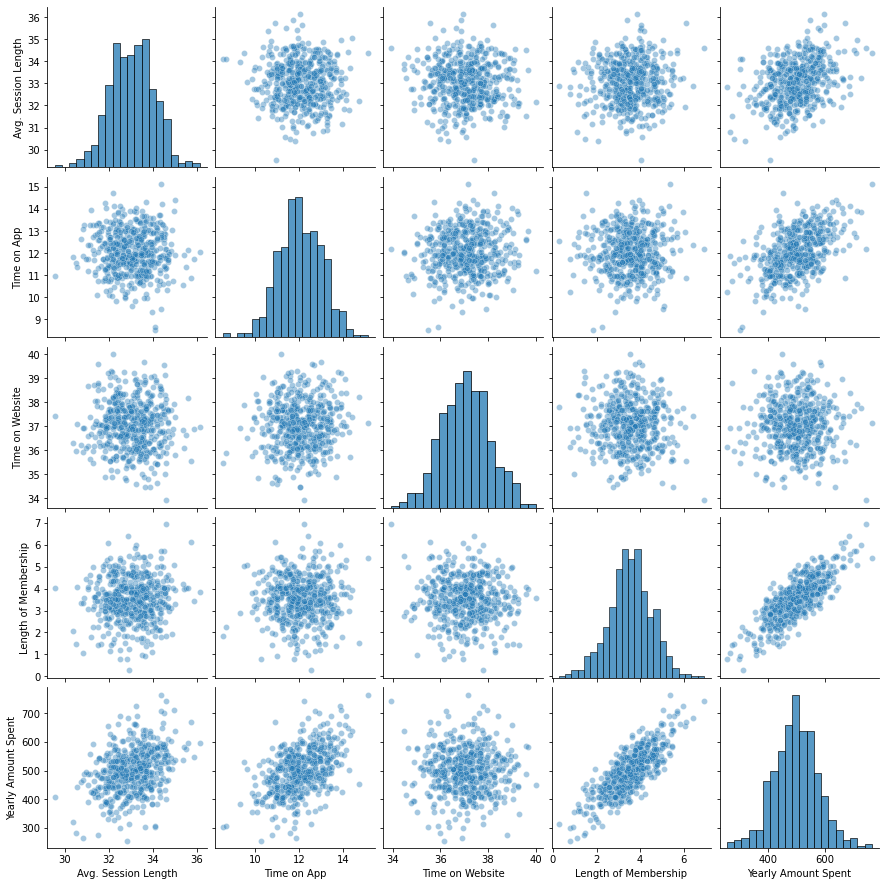

In [9]:
sns.pairplot(data=df,plot_kws={'alpha':0.4})

- After plotting each pair of the variables, it seems that Length of Membership has the strong positive linear relationship with 'Yearly Amount Spent'.
- The 'Time on App' has a weak positive linear relationship with the 'Yearly Amount Spent'.
- Other attributes don't have much of an impact on the output we would like to predict.

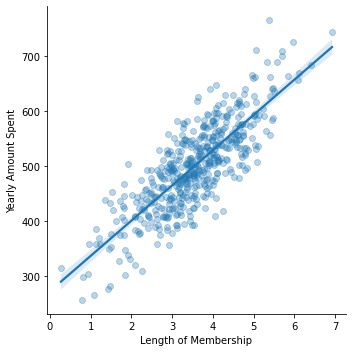

In [10]:
sns.lmplot(x='Length of Membership',
           y='Yearly Amount Spent',
           data=df,
           scatter_kws={'alpha':0.3})

## Training the Model to predict a Value

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = df[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
y= df['Yearly Amount Spent']

In [13]:
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=35)

In [17]:
#Training the model
from sklearn.linear_model import LinearRegression

In [18]:
lm = LinearRegression()

In [19]:
lm.fit(X_train,y_train)

LinearRegression()

In [20]:
lm.coef_

array([26.04142827, 39.04859799,  0.46390669, 61.45216107])

In [21]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coef'])
print(cdf)

                           Coef
Avg. Session Length   26.041428
Time on App           39.048598
Time on Website        0.463907
Length of Membership  61.452161


As seeing from the Coefficient value, the biggest influence of the 'Yearly Amount Spent' is **Length of Membership** and next at the second place is **Time on App** but with much lower number. 

In [22]:
#Predictions
predictions = lm.predict(X_test)
predictions

array([534.69046562, 486.29110733, 553.05921492, 634.4421961 ,
       516.4569946 , 495.26182901, 580.29176101, 502.50557335,
       461.62855094, 576.8547301 , 538.66014954, 398.84676053,
       500.86925245, 474.33119557, 569.35265015, 518.45119534,
       582.06929783, 430.95703175, 565.69001648, 716.91557303,
       493.98559948, 506.97722813, 621.89431184, 466.48044782,
       662.57765574, 433.28694719, 411.62709189, 589.91350016,
       472.91152758, 460.92998572, 377.96686248, 416.61220435,
       537.99563639, 513.48823344, 518.04629586, 521.40531282,
       486.13844838, 374.78240729, 534.30841841, 477.63209073,
       562.83121781, 471.98017705, 449.24027002, 370.69895062,
       515.7757124 , 543.43410712, 502.3752206 , 516.18050672,
       389.50392607, 495.72201722, 550.0992588 , 524.72910123,
       355.01469318, 523.97521015, 524.53755405, 583.96793385,
       531.59569261, 499.50020962, 442.67250309, 411.13448528,
       469.05227788, 531.88249052, 554.60181276, 508.35

### Measure how good the model predicts the data 

In [28]:
measure = pd.DataFrame({
    'Y_predict':predictions,
    'Y_test':y_test
})
measure

,Y_predict,Y_test
77,534.690466,544.779864
441,486.291107,510.539422
164,553.059215,550.047581
273,634.442196,640.786166
6,516.456995,521.572175
...,...,...
465,536.048964,543.132626
314,604.919880,610.128033
239,545.399508,538.774933
99,488.898063,495.299443


In [33]:
measure = measure.reset_index()

In [37]:
measure

,index,Y_predict,Y_test
0,77,534.690466,544.779864
1,441,486.291107,510.539422
2,164,553.059215,550.047581
3,273,634.442196,640.786166
4,6,516.456995,521.572175
...,...,...,...
145,465,536.048964,543.132626
146,314,604.919880,610.128033
147,239,545.399508,538.774933
148,99,488.898063,495.299443


In [38]:
# Convert the dataframe from wide to long format 
dfl = measure.melt(['index'],var_name='category',value_name='value')
dfl

,index,category,value
0,77,Y_predict,534.690466
1,441,Y_predict,486.291107
2,164,Y_predict,553.059215
3,273,Y_predict,634.442196
4,6,Y_predict,516.456995
...,...,...,...
295,465,Y_test,543.132626
296,314,Y_test,610.128033
297,239,Y_test,538.774933
298,99,Y_test,495.299443


<AxesSubplot:xlabel='index', ylabel='value'>

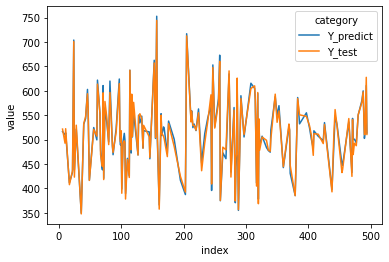

In [39]:
sns.lineplot(data=dfl, x='index', y='value', hue='category')

As we can see from the graph, the model did a good job at predicting the y value as y-test line is nearly overlapping with y-predict line.

We could also use other different methods by checking the Mean Absolute Error, Mean Squared Error, RMSE and analysing the residuals.

In [40]:
# Check how well the model works
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [41]:
print("Mean Absolute Error: ", mean_absolute_error(y_test,predictions))
print("Mean Squared Error: ", mean_squared_error(y_test,predictions))
print("RMSE: ", math.sqrt(mean_squared_error(y_test,predictions)))

Mean Absolute Error:  7.696985697668236
Mean Squared Error:  95.69892211065586
RMSE:  9.782582589002551


In [42]:
# Residual Analysis
residuals = y_test - predictions

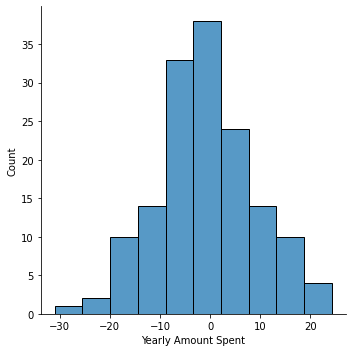

In [43]:
sns.displot(residuals,bins=10)